In [90]:
import xarray as xr
import rasterio
import numpy as np 

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.cm import YlOrBr, Greys, Blues, Reds, Greens
import matplotlib.colors as colors

import sys
sys.path.append("../AWS_Scripts/")

import functions_model_analysis as f

#### PLOT COLOR SCHEMES

Basis:
- #FFFFCC (yellow)
- #FFEDA0 (light yellow)
- #FED976 (light orange)
- #FC8D59 (orange)
- #E34A33 (reddish orange)
- #B30000 (brownish red)
- #662506 (dark brown)
- #808080 (gray)
- #D3D3D3 (lightgray)

More:
- #FEE6CE (pale orange)
- #FDAE6B (bright orange)
- #FDBB84 (warm orange)
- #FC8D62 (coral)
- #EF6548 (reddish coral)
- #D7301F (dark coral)
- #8B0000 (dark red-brown)

light yellow / white: #ffffe5

orange: #fead3a

brown/red: #9c3605      or      firebrick

gray: #808080

lightgray: #D3D3D3

In [91]:
cmap = YlOrBr
cmap.set_bad('gray',1.)
cmap = cmap

In [46]:
### COLORBAR SETTINGS ###

label = "$d_{opt}$ (mm)" # Target label
cbar.ax.tick_params(labelsize=12) # xtick label size
cbar.ax.yaxis.label.set_size(12) # colorbar label size
cbar.ax.annotate('melt', (0.23,0.71), rotation=90, fontsize=10) # melt line text
cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1) # melt line 
# aspect = 15

### TITLE SETTINGS ###
ax.set_title(title, fontsize=14, pad=13) # title


### LABEL SETTINGS ###
ax.set_xlabel(label, fontsize=12)
ax.set_ylabel(label, fontsize=12)

## METHODS

### Data Quality Check: Dotted and Striped Optical Data

In [3]:
dotted_path = r"../Data/optical-rs/2019-05-25_grain_diameter.tif"
striped_path = r"../Data/optical-rs/2017-08-01_grain_diameter.tif"

dotted_data = xr.open_dataarray(dotted_path)
striped_data = xr.open_dataarray(striped_path)

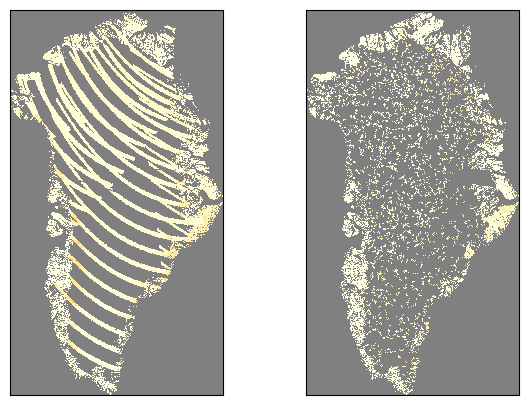

In [22]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,  figsize=(7,5))



dotted_im = dotted_data.plot(ax=axs[0], cmap=cmap, add_colorbar=False)
axs[0].set_title('')


# Plot the continuous data
striped_im = striped_data.plot(ax=axs[1], cmap=cmap, add_colorbar=False)
axs[1].set_title('')

# Adjust the aspect ratio of both subplots to be equal
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

# Hide the x-axis and y-axis labels for both subplots
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[1].set_xlabel('')
axs[1].set_ylabel('')



for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

plt.subplots_adjust(wspace=0.2)
plt.show()

### Raster Alignment Section - Example Microwave vs. Optical

In [10]:
opt_path = r"../Data/optical-rs/2019-07-03_grain_diameter.tif"
mw_path_tif = r"../Data/microwave-rs/mw-tif/2019-07-03_mw.tif"

data_mw_tif = xr.open_dataarray(mw_path_tif)
data_opt = xr.open_dataarray(opt_path)

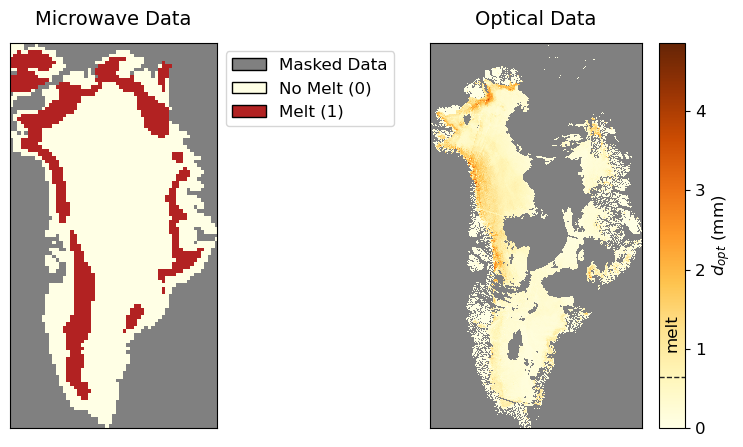

In [19]:
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,  figsize=(10,5))



# Plot the categorical data
colors_list = ["#808080", "#ffffe5", "firebrick"]  # Blue, Green, Red
# Create the colormap
my_cmap = colors.ListedColormap(colors_list)
cat_im = data_mw_tif.plot(ax=axs[0], cmap=my_cmap, add_colorbar=False)
axs[0].set_title('Microwave Data', pad=13)
# set title font size
axs[0].title.set_size(14)


# Add legend to categorical data plot
legend_labels = ['Masked Data', 'No Melt (0)', 'Melt (1)']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors_list[i]) for i in range(3)]
# Iterate through the handles and call `set_edgecolor` on each
for ha in legend_handles:
    ha.set_edgecolor("black")

axs[0].legend(legend_handles, legend_labels, bbox_to_anchor=(1.9,1), fontsize=12)


# Plot the continuous data
cont_im = data_opt.plot(ax=axs[1], cmap=cmap, add_colorbar=False)
axs[1].set_title('Optical Data', pad=13)
# set title font size
axs[1].title.set_size(14)



for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

# Get the colorbar instance
cbar = plt.colorbar(cont_im, ax=axs[1], **cbar_kwargs, aspect=15)
cbar.ax.tick_params(labelsize=12)  # Set the desired label size
# Set the label size
cbar.ax.yaxis.label.set_size(12)
cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1)
cbar.ax.annotate('melt', (0.21,1), rotation=90, fontsize=12)


plt.show()

## RESULTS

### FILL PREDICTION PLOT

In [2]:
# RUN ONLY INITIALLY OR IF MODEL CHANGES

date = "2019-08-14"
path = r"../Data/combined/dataframe_extended/"
data = f.import_data(date_from=date, date_to=date, df_path=path, predict_only=True)
data = f.data_normalization(data)
data.head()

model = f.load_object("LassoRegression")
data_predicted = f.mean_predict(model, data)
f.save_prediction_tif(data_predicted, "mean", f"../Data/results/LassoRegression_2019-08-14_meanPredOnly.tif")

100%|██████████| 1/1 [00:01<00:00,  1.03s/it]
c:\Users\ninaz\anaconda3\envs\master-thesis-3.9\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Not applicable for feature'mw_value'.
Not applicable for feature'col'.
Not applicable for feature'row'.
Not applicable for feature'mw_value_yesterday'.


100%|██████████| 2278725/2278725 [05:41<00:00, 6675.01it/s] 


In [15]:
path_opt = r"../Data/optical-rs/2019-08-14_grain_diameter.tif"
path_lasso = r"../Data/results/LassoRegression_2019-08-14_meanPredOnly.tif"

data_opt = xr.open_dataarray(path_opt)
data_lasso = xr.open_dataarray(path_lasso)

data_opt = data_opt.sel(y=data_lasso.y, x=data_lasso.x)

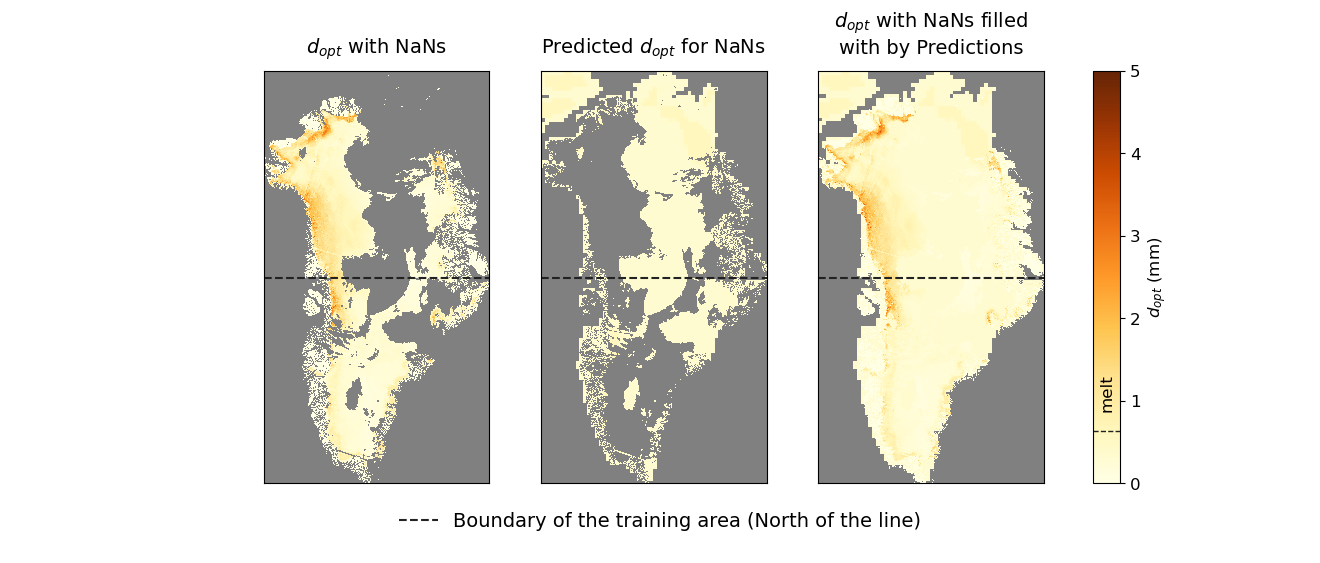

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(13, 8), gridspec_kw={'width_ratios': [1, 1, 1.43]})

# Optical Data for 15.07.2019
p_opt = data_opt.plot(cmap=cmap, ax=axs[0], add_colorbar=False)
p_opt.set_clim(0, 5)
axs[0].axhline(y=-2000000.0, color='#222222', linestyle='--')

# Decision Tree Classifier where Pred is NaN for 15.07.2019
cmap2 = YlOrBr
cmap2.set_bad('gray',1.)
p_dtr = data_lasso.where(np.isnan(data_opt), drop=True).plot(cmap=cmap2, ax=axs[1], add_colorbar=False)   # set max of colorbar = 3 to make melting more clear as most values are below 3 
p_dtr.set_clim(0, 5)
axs[1].axhline(y=-2000000.0, color='#222222', linestyle='--')


p_opt2 = data_opt.plot(cmap=cmap, ax=axs[2], add_colorbar=False)

p_full = data_lasso.where(np.isnan(data_opt), drop=True).plot(cmap="YlOrBr",ax=axs[2], add_colorbar=False)
axs[2].axhline(y=-2000000.0, color='#222222', linestyle='--')


plots = [p_opt, p_dtr, p_full]
titles = ["$d_{opt}$ with NaNs", "Predicted $d_{opt}$ for NaNs", "$d_{opt}$ with NaNs filled\nwith by Predictions"]
for idx, plot in enumerate(plots):
    #plot.axes.title.set_size(15)
    plot.axes.set_title(titles[idx], size=14, pad=13)


for idx, ax in enumerate(axs):
    ax.set_aspect("equal")
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

fig.subplots_adjust(right=0.8)


cbar = plt.colorbar(p_full, location='right', pad=0.15, shrink=0.67, aspect=15)
cbar.set_label("$d_{opt}$ (mm)")
# increase size of cbar labels
cbar.ax.tick_params(labelsize=12)
# increase size of cbar lable
cbar.ax.yaxis.label.set_size(12)
cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1)
cbar.ax.annotate('melt', (0.25,0.9), rotation=90, fontsize=12)
# set cbar clim
p_full.set_clim(0, 5)


# Add legend handle at the bottom
legend_elements = [Line2D([0], [0], color='#222222', linestyle='--', label='Boundary of the training area (North of the line)')]
legend_ax = fig.add_axes([-0.07, 0.15, 1, 0.08])
legend_ax.set_axis_off()
legend_ax.legend(handles=legend_elements, loc='center', ncol=1, frameon=False, fontsize=14) 

fig.subplots_adjust(hspace=0.2)  # Adjust the hspace value as desired
plt.show()


### MEAN PRED, STD, ERROR GRID

In [ ]:
date = "2019-08-14"
path = r"../Data/combined/dataframe_extended/"
data = f.import_data(date_from=date, date_to=date, df_path=path, predict_only=False)
data = f.data_normalization(data)
data.head()

**ONLY RUN THIS CELL IF YOU WANT TO SAVE ALL PREDICTIONS FOR NEW DATE**

In [ ]:
# ONLY RUN IF YOU WANT TO SAVE ALL PREDICTIONS FOR NEW DATE

for idx1, model_name in enumerate(["LinearRegression", "LassoRegression", "RidgeRegression", "ElasticNetRegression", "RandomForest", "XGBoost"]):
#for idx1, model_name in enumerate(["LassoRegression"]):
    model = f.load_object(model_name)
    data_predicted = f.mean_predict(model, data)

    #for metric in ["mean", "std", "error"]:
    for metric in ["error", "residual"]:
        print(model_name, metric)
        f.save_prediction_tif(data_predicted, metric, f"../Data/results/{model_name}_2019-08-14_{metric}.tif")
    print()

C:\Users\ninaz\AppData\Local\Temp\ipykernel_704\4222972631.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


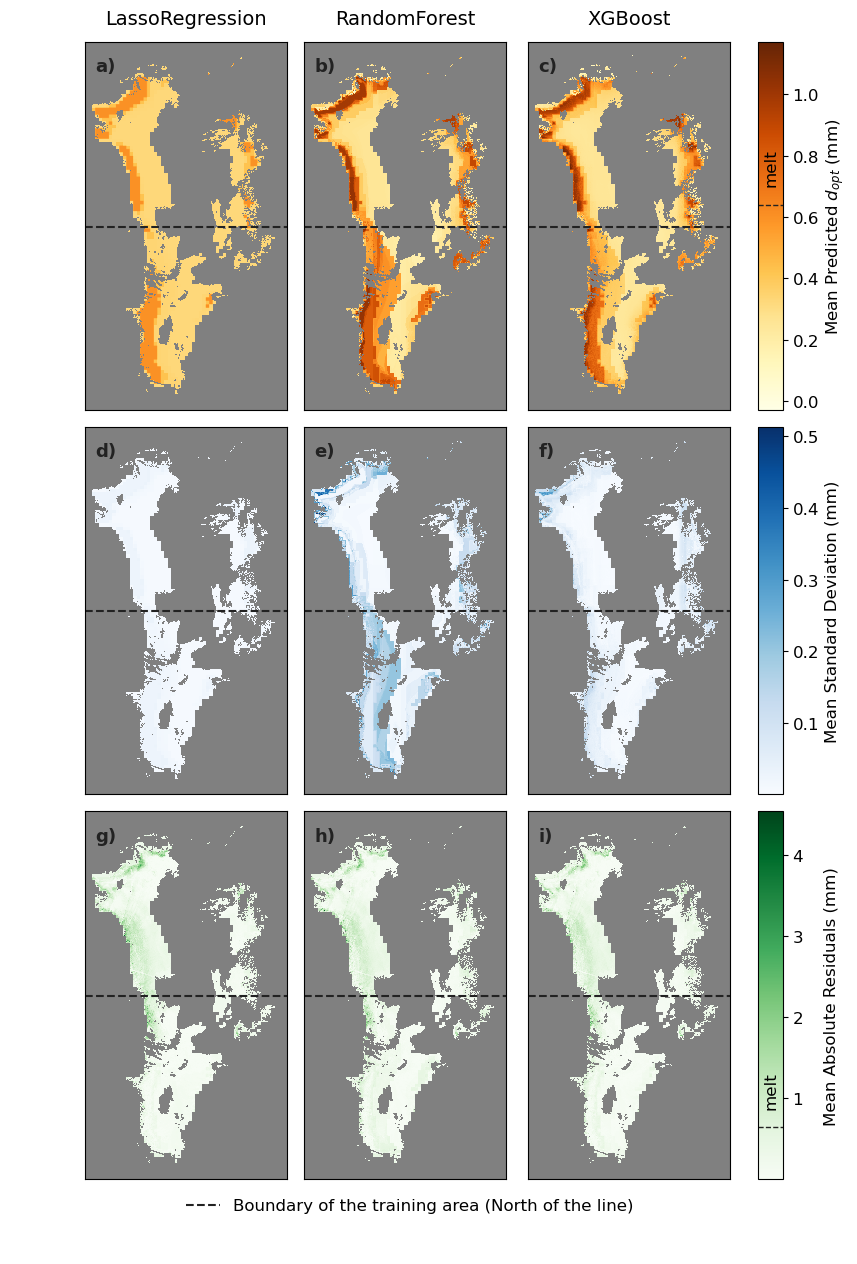

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(8, 12), gridspec_kw={'width_ratios': [1, 1, 1.34]})

# Titles for each column
cols = ["LassoRegression", "RandomForest", "XGBoost"]
rows = ["mean", "std", "error"]
cbar_labels = ["Mean Predicted $d_{opt}$ (mm)", "Mean Standard Deviation (mm)", "Mean Absolute Residuals (mm)"]

plot_numbering = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)", "i)"]


# add subplot to each axis
for idx1, model_name in enumerate(cols):
    for idx2, metric in enumerate(rows):

        data_tif = xr.open_dataarray(f"../Data/results/{model_name}_2019-08-14_{metric}.tif")

        if metric == "mean":
            cmap = YlOrBr
            cmap.set_bad('gray', 1.)
            vmin, vmax = -0.02851607, 1.1704209
        elif metric == "std":
            cmap = Blues
            cmap.set_bad('gray', 1.)
            vmin, vmax = 0.0005309597, 0.5135851
        else:
            cmap = Greens
            cmap.set_bad('gray', 1.)
            vmin, vmax = 0.00000007736733, 4.5371265

        ax = axs[idx2, idx1]
        im = data_tif.plot(cmap=cmap, ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False)
        #im = data_tif.plot(cmap=cmap, ax=ax, add_colorbar=True)
        ax.set_aspect("equal")
        ax.axes.get_xaxis().set_visible(False)
        ax.set_yticks([])
        # set xtick size
        ax.tick_params(axis='x', which='major', labelsize=12)
        ax.set_ylabel("")
        ax.set_title("")
        ax.axhline(y=-2000000.0, color='#222222', linestyle='--')
        # add plot_numbering to right lower corner of each plot
        ax.annotate(plot_numbering[idx2*3+idx1], (0.05,0.92), xycoords='axes fraction', fontsize=13, weight='bold', color='#222222')

         # Create a color bar for the rightmost plot of each row
        if idx1 == len(cols) - 1:
            cbar = plt.colorbar(im, ax=axs[idx2, idx1], location='right', pad=0.1, shrink=1, aspect=15)
            cbar.set_label(cbar_labels[idx2])
            # increase size of cbar labels
            cbar.ax.tick_params(labelsize=12)
            # increase size of cbar lable
            cbar.ax.yaxis.label.set_size(12)
            cbar.ax.axhline(y=0.64, c='#222222', linestyle='--', linewidth=1)    
            if idx2 != 0:
                # set spacing between cbar and cbar label
                #cbar.ax.yaxis.labelpad = 13
                cbar.ax.annotate('melt', (0.23,0.9), rotation=90, fontsize=12)
            else:
                cbar.ax.annotate('melt', (0.23,0.71), rotation=90, fontsize=12)
            if idx2 == 2:
                cbar.ax.yaxis.labelpad = 15



for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontsize=14, pad=13)

#for ax, row in zip(axs[:,0], rows):
    #ax.text(0.5, 1, row, fontsize=14, ha='center', va='center', rotation=90)
    #ax.set_ylabel(row, fontsize=14, rotation=90, labelpad=15)

# Add legend handle at the bottom
legend_elements = [Line2D([0], [0], color='#222222', linestyle='--', label='Boundary of the training area (North of the line)')]
legend_ax = fig.add_axes([-0.07, -0.05, 1, 0.08])
legend_ax.set_axis_off()
legend_ax.legend(handles=legend_elements, loc='center', ncol=1, frameon=False, fontsize=12) 

plt.subplots_adjust(hspace=0.1)
plt.tight_layout()
plt.show()

### UPPER VS LOWER HALF PLOTS

#### Pred vs. Actual

In [102]:

model = f.load_object("XGBoost")

data_predicted = xr.open_dataarray(f"../Data/results/XGBoost_2019-08-14_mean.tif")
north_predicted = data_predicted.where(data_predicted.y > -2000000.0, drop=True)
south_predicted = data_predicted.where(data_predicted.y <= -2000000.0, drop=True)


data_actual = xr.open_dataarray(f"../Data/optical-rs/2019-08-14_grain_diameter.tif")
data_actual = data_actual.where(data_actual.x >= data_predicted.x.min(), drop=True)
data_actual = data_actual.where(data_actual.x <= data_predicted.x.max(), drop=True)
del data_predicted

north_actual = data_actual.where(data_actual.y > -2000000.0, drop=True)
south_actual = data_actual.where(data_actual.y <= -2000000.0, drop=True)
south_actual = south_actual.where(south_actual.y >= south_predicted.y.min(), drop=True)
del data_actual


max_val_north = min(np.nanmax(north_actual), np.nanmax(north_predicted))

# Convert the DataArrays to numpy arrays
actual_melt_north = north_actual.values.flatten()
predicted_melt_north = north_predicted.values.flatten()

actual_melt_south = south_actual.values.flatten()
predicted_melt_south = south_predicted.values.flatten()

del north_actual, north_predicted, south_actual, south_predicted

In [103]:
data_error = xr.open_dataarray(f"../Data/results/XGBoost_2019-08-14_error.tif")
north_error = data_error.where(data_error.y > -2000000.0, drop=True).mean().values
south_error = data_error.where(data_error.y <= -2000000.0, drop=True).mean().values

del data_error

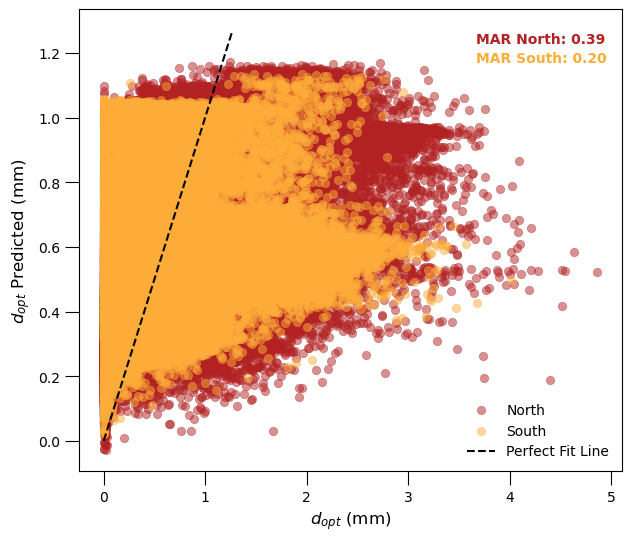

In [122]:
# Create scatter plot
plt.figure(figsize=(7,6))
plt.scatter(actual_melt_north, predicted_melt_north, c='firebrick', label='North', alpha=0.5)
plt.scatter(actual_melt_south, predicted_melt_south, c='#fead3a', label='South',  alpha=0.5)

plt.rcParams['patch.linewidth'] = 0.5

# Plotting the perfect prediction line
plt.plot([0, max_val_north+0.1], [0, max_val_north+0.1], 'k--', label='Perfect Fit Line')

text_north = f"MAR North: {north_error:.2f}"
text_south = f"MAR South: {south_error:.2f}"

plt.text(0.97, 0.95, text_north, transform=plt.gca().transAxes, ha='right', va='top', color='firebrick', fontsize=10, weight='bold')
plt.text(0.9725, 0.91, text_south, transform=plt.gca().transAxes, ha='right', va='top', color='#fead3a', fontsize=10, weight='bold')


plt.xlabel('$d_{opt}$ (mm)', fontsize=12)
plt.ylabel('$d_{opt}$ Predicted (mm)', fontsize=12)
plt.tick_params(axis='both', which='major', size=10)
plt.legend(fontsize=10, loc='lower right', frameon=False)
plt.show()

#### Map

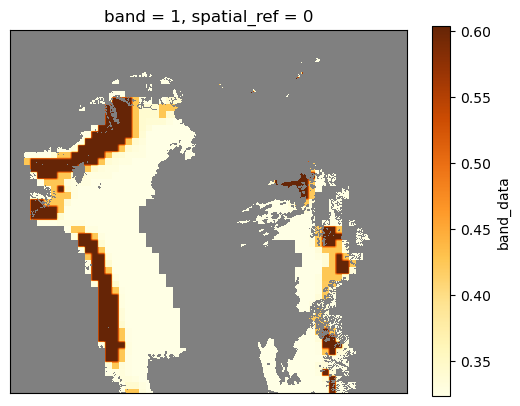

In [6]:
north_pred.plot(cmap=cmap)

# remove axis
ax = plt.gca()
ax.set_aspect("equal")
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# set y-axis limit
plt.ylim(-2000000.0, -662500)
plt.show()

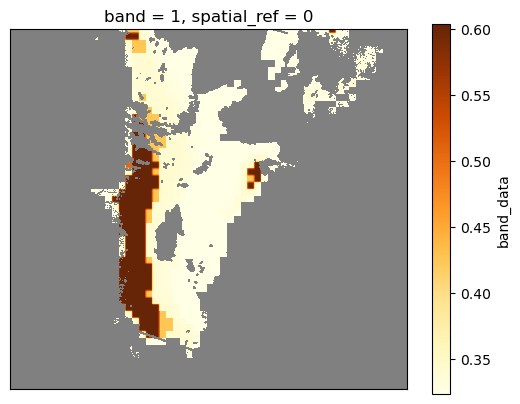

In [11]:
south_pred.plot(cmap=cmap)

# remove axis
ax = plt.gca()
ax.set_aspect("equal")
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# set y-axis limit
plt.ylim(-3324500, -2000000.0)
plt.show()

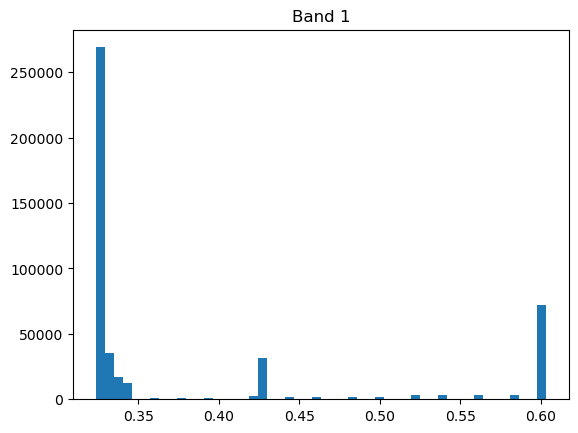

In [9]:
# plot distribution of band data of north_pred
plt.hist(north_pred.sel(band=1).values.flatten(), bins=50)
plt.title(f"Band {1}")
plt.show()

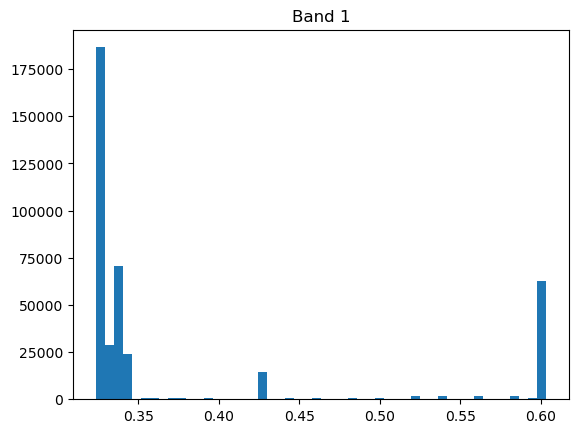

In [10]:
# plot distribution of band data of north_pred
plt.hist(south_pred.sel(band=1).values.flatten(), bins=50)
plt.title(f"Band {1}")
plt.show()

In [12]:
north_error = xr.open_dataarray(f"../Data/results/LassoRegression_2019-08-14_NORTH_error.tif")
south_error = xr.open_dataarray(f"../Data/results/LassoRegression_2019-08-14_SOUTH_error.tif")

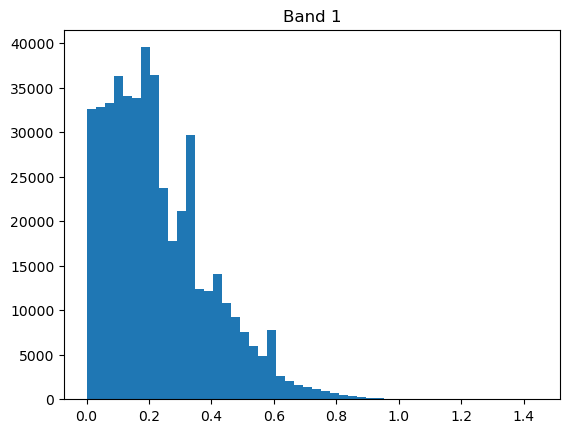

In [14]:
# plot distribution of band data of north_pred
plt.hist(north_error.sel(band=1).values.flatten(), bins=50)
plt.title(f"Band 1")
plt.show()

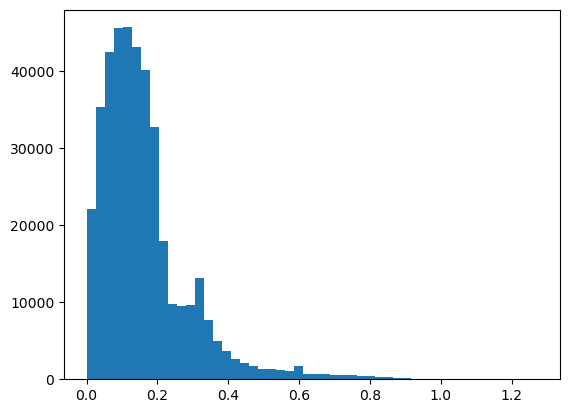

In [15]:
# plot distribution of band data of north_pred
plt.hist(south_error.sel(band=1).values.flatten(), bins=50)
plt.show()

#### Residual

In [19]:
# ONLY RUN IF YOU WANT TO SAVE ALL PREDICTIONS FOR NEW DATE

date_from = "2019-08-01"
date_to = "2019-09-1d0"
path = r"D:/MasterThesis/Data/combined/dataframe_extended/"
data = f.import_data(date_from=date_from, date_to=date_to, df_path=path, predict_only=False)
data = f.data_normalization(data)

# split data into Norther and Southern part at y = -2000000.0 (or 0.49755822689706986 normalized)
data_north = data[data.y > 0.49755822689706986]
data_south = data[data.y < 0.49755822689706986]

del data

100%|██████████| 41/41 [05:46<00:00,  8.45s/it]


Not applicable for feature'mw_value'.
Not applicable for feature'col'.
Not applicable for feature'row'.
Not applicable for feature'mw_value_yesterday'.


In [37]:
data_north.head()

,x,y,mw_value,opt_value,col,row,mean_3,mean_9,sum_5,mw_value_yesterday,mw_value_7_day_average,hours_of_daylight,elevation_data,slope_data,aspect_data,distance_to_margin
0,0.577002,0.995492,0.0,0.057157,843,12,0.0,0.0,0.0,0.0,0.0,1.0,0.053330,0.064297,0.953907,0.012024
1,0.575633,0.995116,0.0,0.147780,841,13,0.0,0.0,0.0,0.0,0.0,1.0,0.073904,0.062033,0.983371,0.016032
2,0.576318,0.995116,0.0,0.049130,842,13,0.0,0.0,0.0,0.0,0.0,1.0,0.072009,0.059796,0.996260,0.014028
3,0.577002,0.995116,0.0,0.010350,843,13,0.0,0.0,0.0,0.0,0.0,1.0,0.080130,0.074678,0.945504,0.012024
4,0.578371,0.995116,0.0,0.010864,845,13,0.0,0.0,0.0,0.0,0.0,1.0,0.117217,0.054006,0.908647,0.008016


In [23]:
def residual_analysis(model, data_north, data_south):
    pred_north = f.mean_predict(model, data_north)
    pred_south = f.mean_predict(model, data_south)
    
    plt.figure(figsize=(15, 5))

    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    #####################
    data_north = pred_north['residual_prediction']
    ax1.hist(data_north, bins=100, color='grey')
    ax1.grid(color='lightgray')
    ax1.set_xlabel('Deviation', fontsize = 9)
    ax1.set_ylabel('Frequency', fontsize = 9)
    ax1.set_title('Residual Distribution Histogram - NORTH')
    ax1.axvline(x=0, color='firebrick', linestyle='--')
    ax1.text(0.5, 0.8, f"Mean Error: {pred_north['error_prediction'].mean():.2f}\nMean Residual: {pred_north['residual_prediction'].mean():.2f}", transform=ax1.transAxes, fontsize=12)

    data_south = pred_south['residual_prediction']
    ax2.hist(data_south, bins=100, color='grey')
    ax2.grid(color='lightgray')
    ax2.set_xlabel('Deviation', fontsize = 9)
    ax2.set_ylabel('Frequency', fontsize = 9)
    ax2.set_title('Residual Distribution Histogram- SOUTH')
    ax2.axvline(x=0, color='firebrick', linestyle='--')
    ax2.text(0.5, 0.8, f"Mean Error: {pred_south['error_prediction'].mean():.2f}\nMean Residual: {pred_south['residual_prediction'].mean():.2f}", transform=ax2.transAxes, fontsize=12)

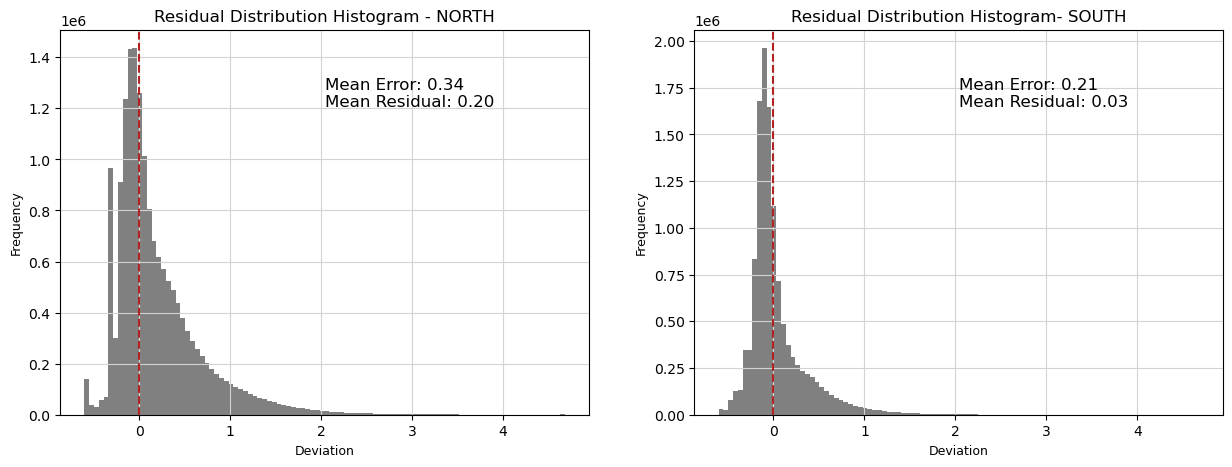

In [24]:
model = f.load_object("LassoRegression")
residual_analysis(model, data_north, data_south)

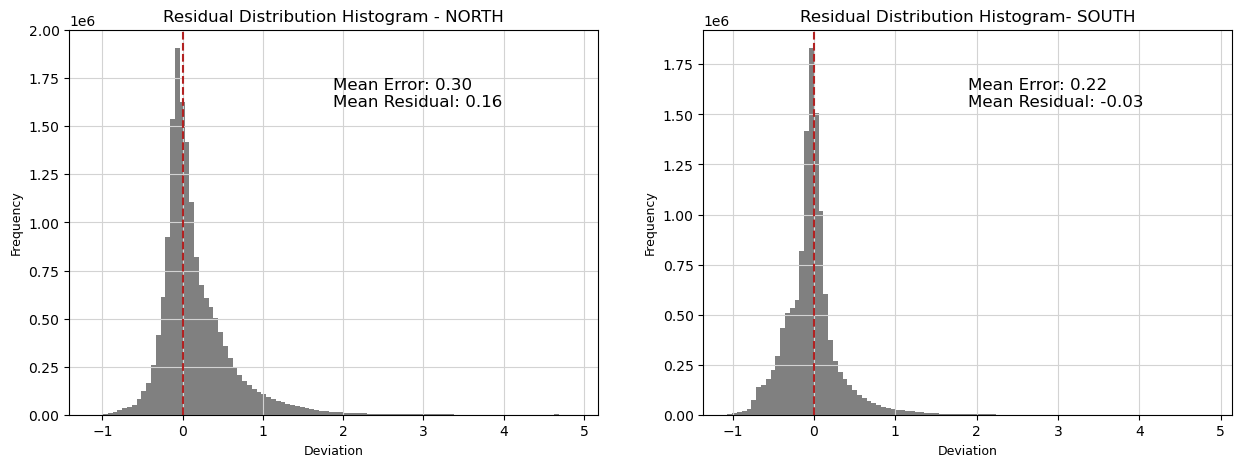

In [35]:
model = f.load_object("RandomForest")
residual_analysis(model, data_north, data_south)

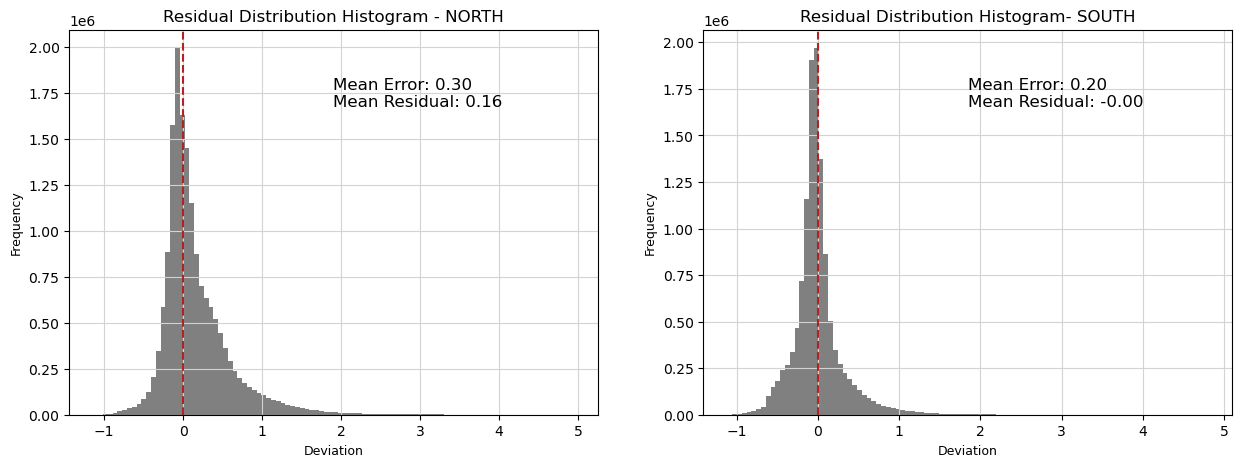

In [36]:
model = f.load_object("XGBoost")
residual_analysis(model, data_north, data_south)

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2D grid of latitude and longitude values for the northern region
north_latitudes = data_north['x'].values
north_longitudes = data_north['y'].values
north_melt_values = data_north['opt_value'].values

# Reshape the melt values to match the grid dimensions
north_melt_grid = north_melt_values.reshape((len(north_longitudes), len(north_latitudes)))

# Create a heatmap for the northern region
plt.figure(figsize=(10, 8))
plt.imshow(north_melt_grid, cmap='hot', origin='lower')
plt.colorbar(label='Melt Values')
plt.title('Greenland Northern Region Melt Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

ValueError: cannot reshape array of size 16529461 into shape (16529461,16529461)

In [42]:
len(north_latitudes)

16529461

In [46]:
len(data_north["x"].unique())

1275

In [47]:
len(data_north["y"].unique())

1326

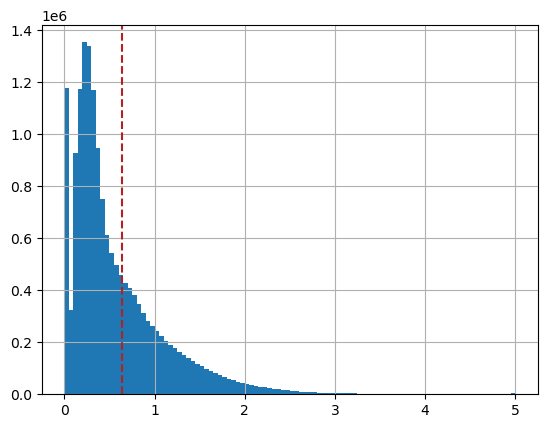

In [64]:
(np.exp(data_north["opt_value"])-1).hist(bins=100)
# add vertical line at 0.64
plt.axvline(x=0.64, color='firebrick', linestyle='--')

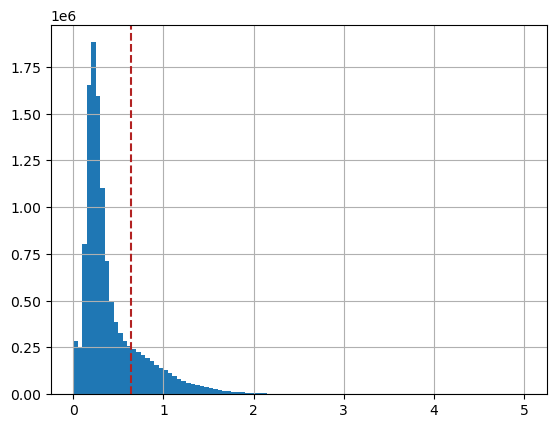

In [65]:
(np.exp(data_south["opt_value"])-1).hist(bins=100)
plt.axvline(x=0.64, color='firebrick', linestyle='--')

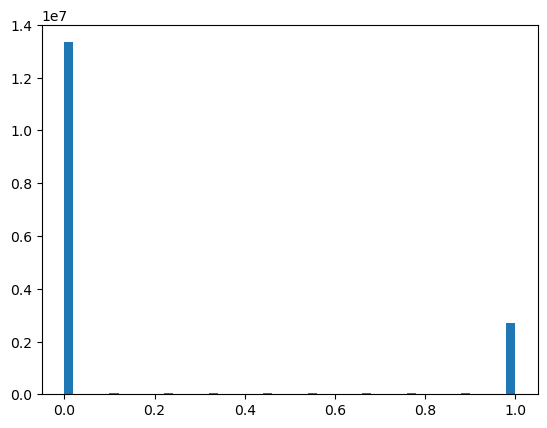

In [57]:
# plot the distribution of the feature mean_9 normalized
plt.hist(data_north["mean_9"], bins=50)
plt.show()
